# Quantum Teleportation

### Goal

Send quantum information from one qubit in a state $ \left| \psi \right\rangle $ from one person to another. This is called quantum teleportation because we can't copy the state of a qubit, so that to transfer this state we must modify the original qubit.

### Algorithm

As we can't copy the state we must use another method for this transfering

In [2]:
import qiskit as qk
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute, Aer
from qiskit.tools.visualization import plot_histogram

In [1]:
# ------------------------------- Initialization --------------------------------------#
"""
 Creates a quantum circuit with 3 qubits (0 = bit to be sent, 1 = senders intermediate bit
 , 2 = receivers bit)
"""
q = QuantumRegister(3)

# Classical bits to store the result
c = ClassicalRegister(3)
qc = QuantumCircuit(q, c)

# Defines the state of the bit to be transfered (may have any operations here)
qc.x(0)
qc.h(0)
qc.z(0)

qc.barrier()

# ---------------------------------- 1a Step -----------------------------------------#
"""
    We need to entangle the senders intermediate qubit with the receivers qubit.
    For this, we apply a Hadamard in the senders qubit to let it in a superposition 
    state and then proceed applying a cnot with the superposition bit as control
    and the other as target. With this, we obtain a state of entanglement because 
    the value in one qubit will depend on the other, as the control has 50% chance 
    of being in each state and the target bit will be altered only if the control
    bit is 1. Thereby, the only possible values (disconsidering noise and decoherence
    are |00> and |11> for the pair. This is called Bell State or Bell Pair because
    the states |+> e |-> are called Bell Basis.
"""
qc.cx(1, 2)

qc.barrier()

# ---------------------------------- 2a Step -----------------------------------------#
"""
    Now we need to apply a CNOT with the senders intermediate bit as targer and with
    the bit we desire to send as control. This will end up resulting in an entangled  
    state between the 3 qubits, in such a way that the value of each of them depends 
    on the values of the others. 
"""
qc.cx(0, 1)

qc.barrier()

# ---------------------------------- 3a Step -----------------------------------------#
"""
    Next, we apply a Hadamard on the qubit to be sent and perform a measurement
    of the 2 qubits from the sender.
"""
qc.h(0)
qc.measure(0, 0)
qc.measure(1, 1)

qc.barrier()

# ---------------------------------- 4a Step -----------------------------------------#
"""
    At last, depending on the result of the measurements (which would have to be 
    transfered classically to the receiver), it may be necessary to apply some 
    operation to the receivers qubit, following the table below:
      Measurement       Operation
        
          00             Nothing
          01                X
          10                Z
          11                ZX
    
    With this, the receivers bit will be equal to the original state of the qubit
    we intended to send by the sender.
"""
qc.cz(0, 2)
qc.cx(1, 2)

qc.barrier()

qc.draw(output="mpl")
# ---------------------------------- Measurement -----------------------------------------#
"""
    If the transmission worked, we must be able to obtain the original state of the
    qubit 2 (received) applying again the transformations that were made to obtain the
    original value of the qubit to be sent, because quantum gates are reversible.
    (In this case the original value of the qubit 2 was |0> bacause that's the state they 
    begin at)
"""
qc.x(0)
qc.h(0)
qc.z(0)
qc.measure(q[2], c[2])



NameError: name 'QuantumRegister' is not defined

### Simulating

{'001': 249, '011': 269, '010': 262, '000': 244}


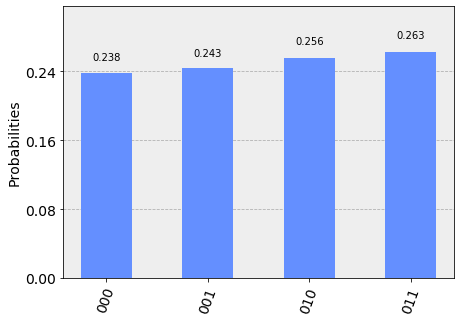

In [8]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

In this graph, we have that the order is c2c1c0. As we can see by the results, the bit c2 (received) is always 0 as was expected (because we are not considering decoherence nor noise), which shows that the teleportation worked.

### Bibliography:

    Abraham Asfaw, Luciano Bello, Yael Ben-Haim, Sergey Bravyi, Lauren Capelluto, Almudena Carrera Vazquez, Jack Ceroni, Jay Gambetta, Shelly Garion, Leron Gil, Salvador De La Puente Gonzalez, David McKay, Zlatko Minev, Paul Nation, Anna Phan, Arthur Rattew, Javad Shabani, John Smolin, Kristan Temme, Madeleine Tod, James Wootton. "Learn Quantum Computation using Qiskit." (August 2019). 
    Retrieved from http://community.qiskit.org/textbook